In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/XX401/data/전기차충전소현황(제공표준).csv',encoding='cp949')

df.head()

,충전소명,이용가능시간,충전기상태,충전기타입,소재지도로명주소,관리업체명,관리업체전화번호,위도,경도,충전소ID,충전기ID,충전기용량,기관ID,상태갱신일자,데이터기준일자
0,양평공영주차장,24시간 이용가능,9,6,경기도 양평군 양서면 용담리 507-10,환경부,1661-9408,37.54260,127.32532,ME18B146,1,100.0,ME,2.024010e+13,NaN
1,여주(강릉) 휴게소,24시간 이용가능,3,6,경기도 여주시 가남읍 여주남로 722,환경부,1661-9408,37.23783,127.56823,ME18B147,1,100.0,ME,2.024010e+13,NaN
2,여주(인천) 휴게소,24시간 이용가능,3,6,경기도 여주시 가남읍 화평길 116,환경부,1661-9408,37.23977,127.56797,ME18B148,1,100.0,ME,2.024010e+13,NaN
3,동탄2수질복원센터,24시간 이용가능,3,6,경기도 화성시 동탄면 동탄산단7길 60,환경부,1661-9408,37.17631,127.08553,ME183191,1,50.0,ME,2.024010e+13,NaN
4,동탄2수질복원센터,24시간 이용가능,2,4,경기도 화성시 동탄면 동탄산단7길 60,환경부,1661-9408,37.17631,127.08553,ME183191,2,100.0,ME,2.024010e+13,NaN


In [3]:
len(set(df['충전소명']))

16360

In [4]:
def cat(x):
  str_list1=['주유소' , '에너지']
  str_list2=['병원', '체육관', '체육광장', '도서관', '센터', '캠핑장', '수련관', '복지', '쉼터', '리조트', '박물관', '관리사무소', '의료원', '문화재단', '종합경기타운',
             '아람누리','교회', '운동장', '관리소', '수영관', '수영장', '킨텍스', '장례식장', '마리나', '컨벤션', '스타디움', '아트리움', '시니어클럽','센트럴 돔', '레포츠타운','주민센터']
  str_list3=['공원', '파크', '왕릉', '유원지', '랜드','공영','시장']
  str_list4=['휴게소', '졸음쉼터', '도로', '터미널']
  str_list5=['회관', '공사', '사무소', '시청', '구청', '기술원', '공단', '환경청', '지사', '테크노파크', '군청', '교육지원청', '수덕원', '교육원', '하수처리장', '연수원', '연구원'
             '진흥원', '중부지소', '경찰서', '소방서', '경챁청', '예비군', '사업단', '교도소', '파출소' , '지구대', '보건소', '보건지소']
  str_list6=['이마트', '스타필드', '마트', '아울렛', '홈플러스', '농협', '벨라시티', '가게', '편의점', '매장']
  str_list7=['학교', '주차', '주차장', '대학', '충전소']
  str_list8=['영업소', '사업소', '(주)', '에이팩','스테이션', '엠파이어', '비전타워', 'IT밸리', '운수', '공장',
             '매매', '서비스']


  if any(str in x for str in str_list1) :
    return '주유소'
  elif any(str in x for str in str_list2) :
    return '편의시설'
  elif any(str in x for str in str_list3) :
    return '공영주차장'
  elif any(str in x for str in str_list4) :
    return '도로, 휴게소'
  elif any(str in x for str in str_list5) :
    return '공공기관'
  elif any(str in x for str in str_list6) :
    return '쇼핑센터'
  elif any(str in x for str in str_list7) :
    return '주차장'
  elif any(str in x for str in str_list8) :
    return '상업소'
  else :
    return '주거공간'

In [ ]:
"공영" in "시장 공영주차장"

True

In [5]:
df['분류유형']='주거공간'


df['분류유형']= df['충전소명'].apply(cat)
df.head()

,충전소명,이용가능시간,충전기상태,충전기타입,소재지도로명주소,관리업체명,관리업체전화번호,위도,경도,충전소ID,충전기ID,충전기용량,기관ID,상태갱신일자,데이터기준일자,분류유형
0,양평공영주차장,24시간 이용가능,9,6,경기도 양평군 양서면 용담리 507-10,환경부,1661-9408,37.54260,127.32532,ME18B146,1,100.0,ME,2.024010e+13,NaN,공영주차장
1,여주(강릉) 휴게소,24시간 이용가능,3,6,경기도 여주시 가남읍 여주남로 722,환경부,1661-9408,37.23783,127.56823,ME18B147,1,100.0,ME,2.024010e+13,NaN,"도로, 휴게소"
2,여주(인천) 휴게소,24시간 이용가능,3,6,경기도 여주시 가남읍 화평길 116,환경부,1661-9408,37.23977,127.56797,ME18B148,1,100.0,ME,2.024010e+13,NaN,"도로, 휴게소"
3,동탄2수질복원센터,24시간 이용가능,3,6,경기도 화성시 동탄면 동탄산단7길 60,환경부,1661-9408,37.17631,127.08553,ME183191,1,50.0,ME,2.024010e+13,NaN,편의시설
4,동탄2수질복원센터,24시간 이용가능,2,4,경기도 화성시 동탄면 동탄산단7길 60,환경부,1661-9408,37.17631,127.08553,ME183191,2,100.0,ME,2.024010e+13,NaN,편의시설


In [ ]:
#set(df['분류유형'])

In [6]:
df.to_csv('/content/drive/MyDrive/XX401/data/전기차충전소_유형.csv',index=False)

In [7]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [8]:
#유형별 충전소 개수
df_for_plot=df.groupby('분류유형')['충전소명'].count()

In [9]:
df_for_plot=df_for_plot.sort_values()
df_for_plot

분류유형
주유소          256
도로, 휴게소      527
상업소         1045
공공기관        1408
쇼핑센터        1835
주차장         3269
편의시설        3759
공영주차장       7523
주거공간       58933
Name: 충전소명, dtype: int64

In [10]:
data = df_for_plot.values
keys = df_for_plot.index

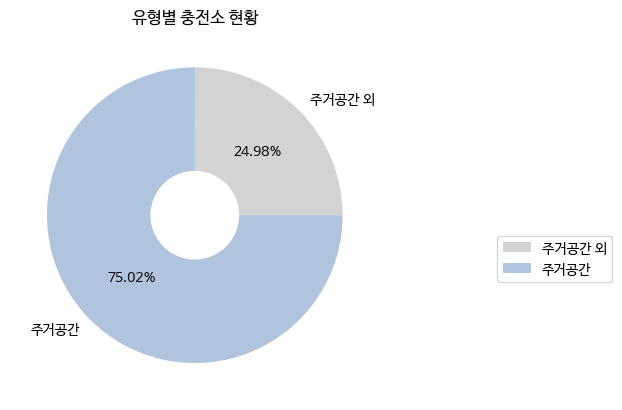

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

data1=[data[0]+data[1]+data[2]+data[3]+data[4]+data[5]+data[6]+data[7],data[8]]
keys1=['주거공간 외',keys[8]]

# Plotting data on chart
plt.pie(data1, labels=keys1, autopct='%.2f%%',colors=['lightgray','lightsteelblue'],wedgeprops=dict(width=0.7),startangle=0)

# Add title to the chart
plt.title('유형별 충전소 현황')
plt.legend(labels=keys1, loc='lower left', bbox_to_anchor=(1.3, 0.3))
# Displaying chart
plt.show()
print()

In [12]:
keys

Index(['주유소', '도로, 휴게소', '상업소', '공공기관', '쇼핑센터', '주차장', '편의시설', '공영주차장',
       '주거공간'],
      dtype='object', name='분류유형')

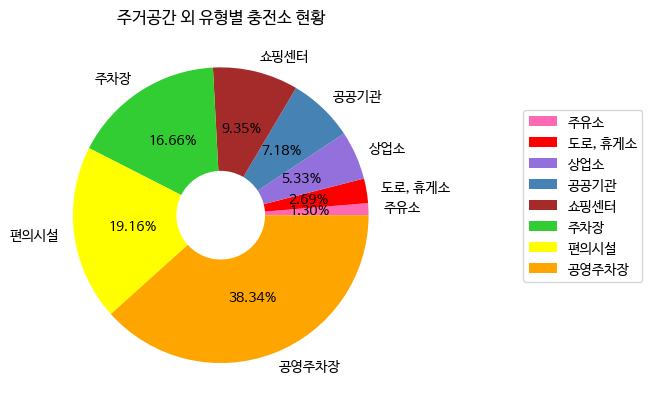

In [25]:
data2=[data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7]]
keys2=[keys[0],keys[1],keys[2],keys[3],keys[4],keys[5],keys[6],keys[7]]
colors=['hotpink','red','mediumpurple','steelblue','brown','limegreen','yellow','orange']

# Plotting data on chart
plt.pie(data2, labels=keys2, autopct='%.2f%%',colors=colors,wedgeprops=dict(width=0.7),startangle=0)

# Add title to the chart
plt.title('주거공간 외 유형별 충전소 현황')
plt.legend(labels=keys, loc='lower left', bbox_to_anchor=(1.3, 0.3))
# Displaying chart
plt.show()

In [ ]:
def get_color(x):
  if x=='공영주차장':
    return 'orange'
  elif x=='공공기관':
    return 'blue'
  elif x=='편의시설':
    return 'yellow'
  elif x=='주차장':
    return 'gray'
  elif x=='주유소':
    return 'pink'
  elif x=='쇼핑센터':
    return 'brown'
  elif x=='상업소':
    return 'purple'
  elif x=='도로, 휴게소':
    return 'red'
  elif x=='그외 주거공간':
    return 'green'


In [ ]:
import folium

m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11,
)

df['위도'].apply(lambda x: float(x))
df['경도'].apply(lambda x: float(x))


for index in range(len(df)):
    color=get_color(df.iloc[index]['분류유형'])
    folium.Circle(radius=2,location=[df.iloc[index]['위도'], df.iloc[index]['경도']], color=color).add_to(m)

#mymap.save("map_with_colored_markers.html")
m

NameError: name 'get_color' is not defined